In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/The files

/content/drive/MyDrive/The files


In [ ]:
import pandas as pd
import re
import string
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from hazm import Normalizer, word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud_fa import WordCloudFa

In [ ]:
dfList = [pd.read_excel(f'parsed_data_part_{i}.xlsx') for i in range(0,11)]

In [ ]:
df = pd.concat(dfList, axis=0)


In [ ]:
# Try to decode using different encodings
encodings_to_try = [ 'utf-8','latin-1', 'utf-16', 'ascii']  # Add other encodings as needed
for encoding in encodings_to_try:
    try:
        decoded_content = df['Content'].apply(lambda x: x if isinstance(x, str) else str(x))
        decoded_content.apply(lambda x: x.encode(encoding).decode(encoding))
        print(f"Decoding successful with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with encoding: {encoding}")

# Remove the "\n" characters from the text column
df['Content'] = df['Content'].str.replace('\n', '')
df['Date'] = df['Date'].str.replace('\\', '-')
df["DID"] = df["DID"].astype("str")
df['Cat'] = df['Cat'].astype('category')
df["Content"] = df["Content"].astype("str")
# Function to remove punctuation from text
def remove_punctuation(text):
    # Define a translation table with all punctuation characters mapped to None
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuation using the translation table
    return text.translate(translator)

# Apply the function to the "Content" column
df['Content'] = df['Content'].apply(remove_punctuation)
df
# Function to remove numbers from text using regular expressions
def remove_numbers(text):
    # Use regular expression to remove all numbers
    return re.sub(r'\d+', '', text)

# Apply the function to the "Content" column
df['Content'] = df['Content'].apply(remove_numbers)

# Display the DataFrame
df
from hazm import WordTokenizer , Lemmatizer,stopwords_list
tokenizer = WordTokenizer()
df['Tokenized_Content'] = df['Content'].apply(lambda text: tokenizer.tokenize(text))
# Read stop words from the text file
with open("PersianStopWords.txt", "r", encoding="utf-8") as file:
    stop_words = set(file.read().splitlines())

# Define a function to remove stop words
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply the function to the "Tokenized_Content" column
df['Tokenized_Content'] = df['Tokenized_Content'].apply(remove_stop_words)

Decoding successful with encoding: utf-8


<ipython-input-17-ca3682915555>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Date'] = df['Date'].str.replace('\\', '-')


In [ ]:
df['Tokenized_Content'] = df['Tokenized_Content'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
normalizer = Normalizer()
df['Tokenized_Content'] = df['Tokenized_Content'].apply(lambda text: normalizer.normalize(text))

In [ ]:
df['Content'] = df['Tokenized_Content']

In [ ]:
random_sample = df.sample(n=50000)

In [ ]:
wc = WordCloudFa(no_reshape=True, width=1200, height=800)

In [ ]:
text = ' '.join(random_sample['Content'].astype(str))

In [ ]:
word_cloud = wc.generate(text)

In [ ]:
image = word_cloud.to_image()

In [ ]:
image.save('persian-example.png')

In [ ]:
%pip install polyglot

In [ ]:
%pip install icu

In [ ]:
%pip install pyicu

In [ ]:
%pip install pycld2

  Using cached pycld2-0.41.tar.gz (41.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904035 sha256=26a664dcf3ecf4fa8e403c7c309938fc49d0aefbee7ae034792153d78953e4fb
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [ ]:
%pip install morfessor

In [ ]:
!polyglot download LANG:fa

[polyglot_data] Downloading collection 'LANG:fa'
[polyglot_data]    | 
[polyglot_data]    | Downloading package sgns2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package unipos.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package ner2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package counts2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package transliteration2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package embeddings2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package uniemb.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package sentiment2.fa to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package tsne2.fa to
[polyglot_data]    |     /root/polyglot_dat

In [ ]:
!polyglot download sentiment2.fa

[polyglot_data] Downloading package sentiment2.fa to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package sentiment2.fa is already up-to-date!


In [ ]:
from polyglot.text import Text

In [ ]:
from hazm import SentenceTokenizer

In [ ]:
tokenizer = SentenceTokenizer()
df['Tokenized_Sentences'] = df['Content'].apply(lambda text: tokenizer.tokenize(text))

In [ ]:
from polyglot.text import Text

def analyze_sentiment(sentences):
    try:
        avg_polarity = []

        # Iterate through each sentence in the list of sentences
        for text in sentences:
            # Create a Polyglot Text object from the input text with language set to Persian
            text_obj = Text(text)

            # Initialize variables to track sentiment polarity
            polarity = 0

            # Iterate through words in each sentence
            for sentence in text_obj.sentences:
                for word in sentence.words:
                    # Update polarity based on each word's polarity in the sentence
                    polarity += word.polarity

            # Append the polarity of the current sentence to the list
            avg_polarity.append(polarity)

        # Calculate the average polarity for all sentences in the row
        if avg_polarity:
            average_polarity = sum(avg_polarity) / len(avg_polarity)
        else:
            average_polarity = None

        return average_polarity
    except Exception as e:
        # Handle any errors that may occur during sentiment analysis
        print(f"Error occurred: {e}")
        return None




In [ ]:
# Apply sentiment analysis to the "Tokenized_Sentences" column of your DataFrame
df['Polarity'] = df['Tokenized_Sentences'].apply(analyze_sentiment)

Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: Package 'sentiment2.sd' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ku
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.kk
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: Package 'sentiment2.un' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: Package 'sentiment2.un' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.af


Error occurred: Package 'sentiment2.xh' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: Package 'sentiment2.zzp' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.en


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: Package 'sentiment2.sd' not found in index


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: Package 'sentiment2.sd' not found in index
Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ps


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ur


Error occurred: This resource is available in the index but not downloaded, yet. Try to run

polyglot download sentiment2.ar


In [ ]:
# Define a function to map polarity values to sentiment categories
def map_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the mapping function to the "Polarity" column and save the result in a new column "Sentiment"
df['Sentiment'] = df['Polarity'].apply(lambda x: map_sentiment(x))


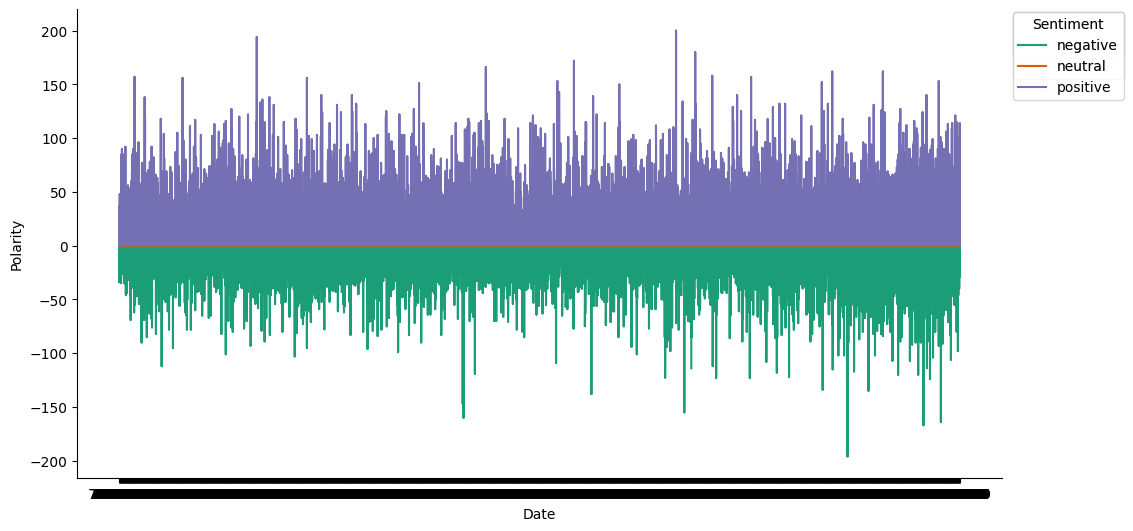

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Polarity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Polarity')

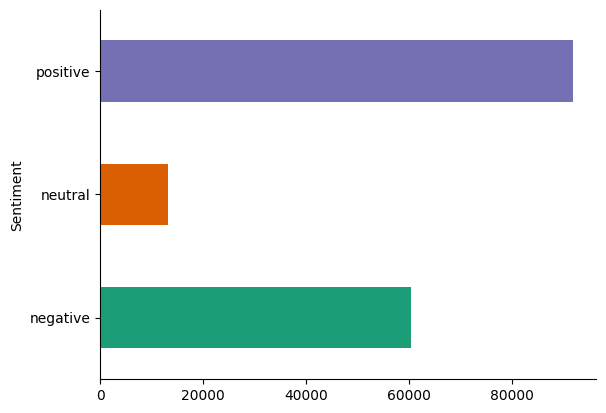

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

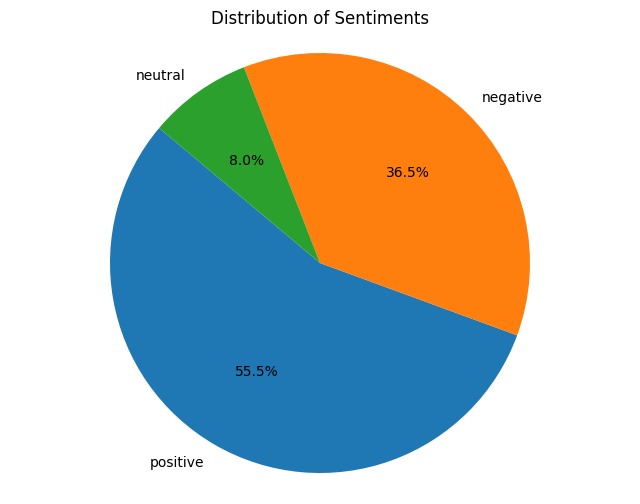

In [ ]:
# Count the occurrences of each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

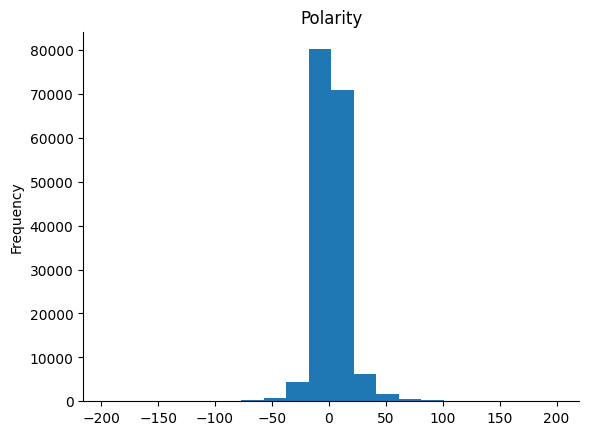

In [ ]:
from matplotlib import pyplot as plt
df['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

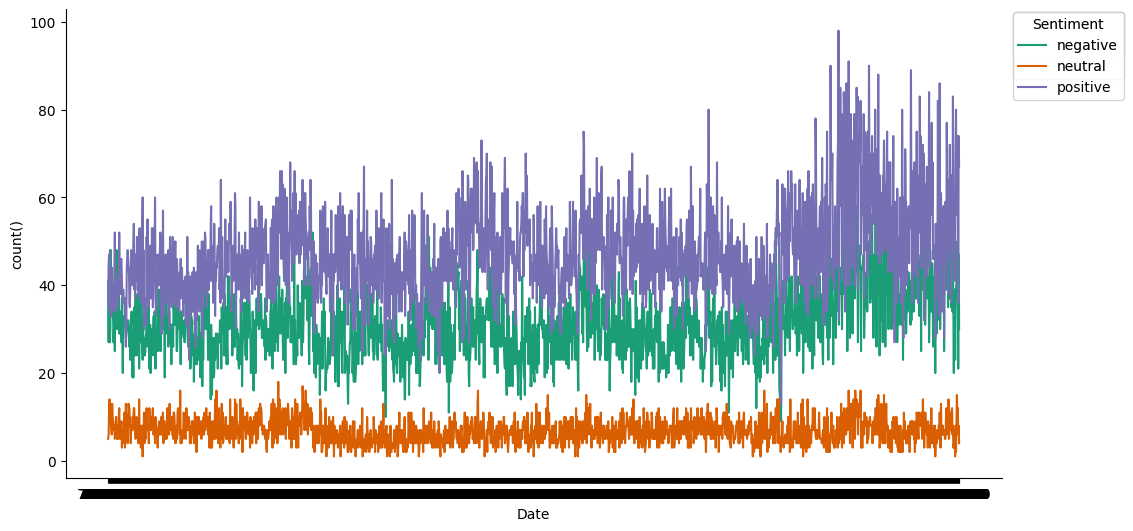

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

## Data visualization

### Bar plot from the "Cat" column

In [ ]:
cat_counts = df['Cat'].value_counts()
cat_counts

Cat
siasi      17530
eqtes      16660
kharj      14665
akhar      13810
vrzsh      13010
           ...  
Theatre        3
Musical        3
igozar         3
Polig          2
Thought        2
Name: count, Length: 105, dtype: int64

There are too many categories. let's see the first 20 Categories

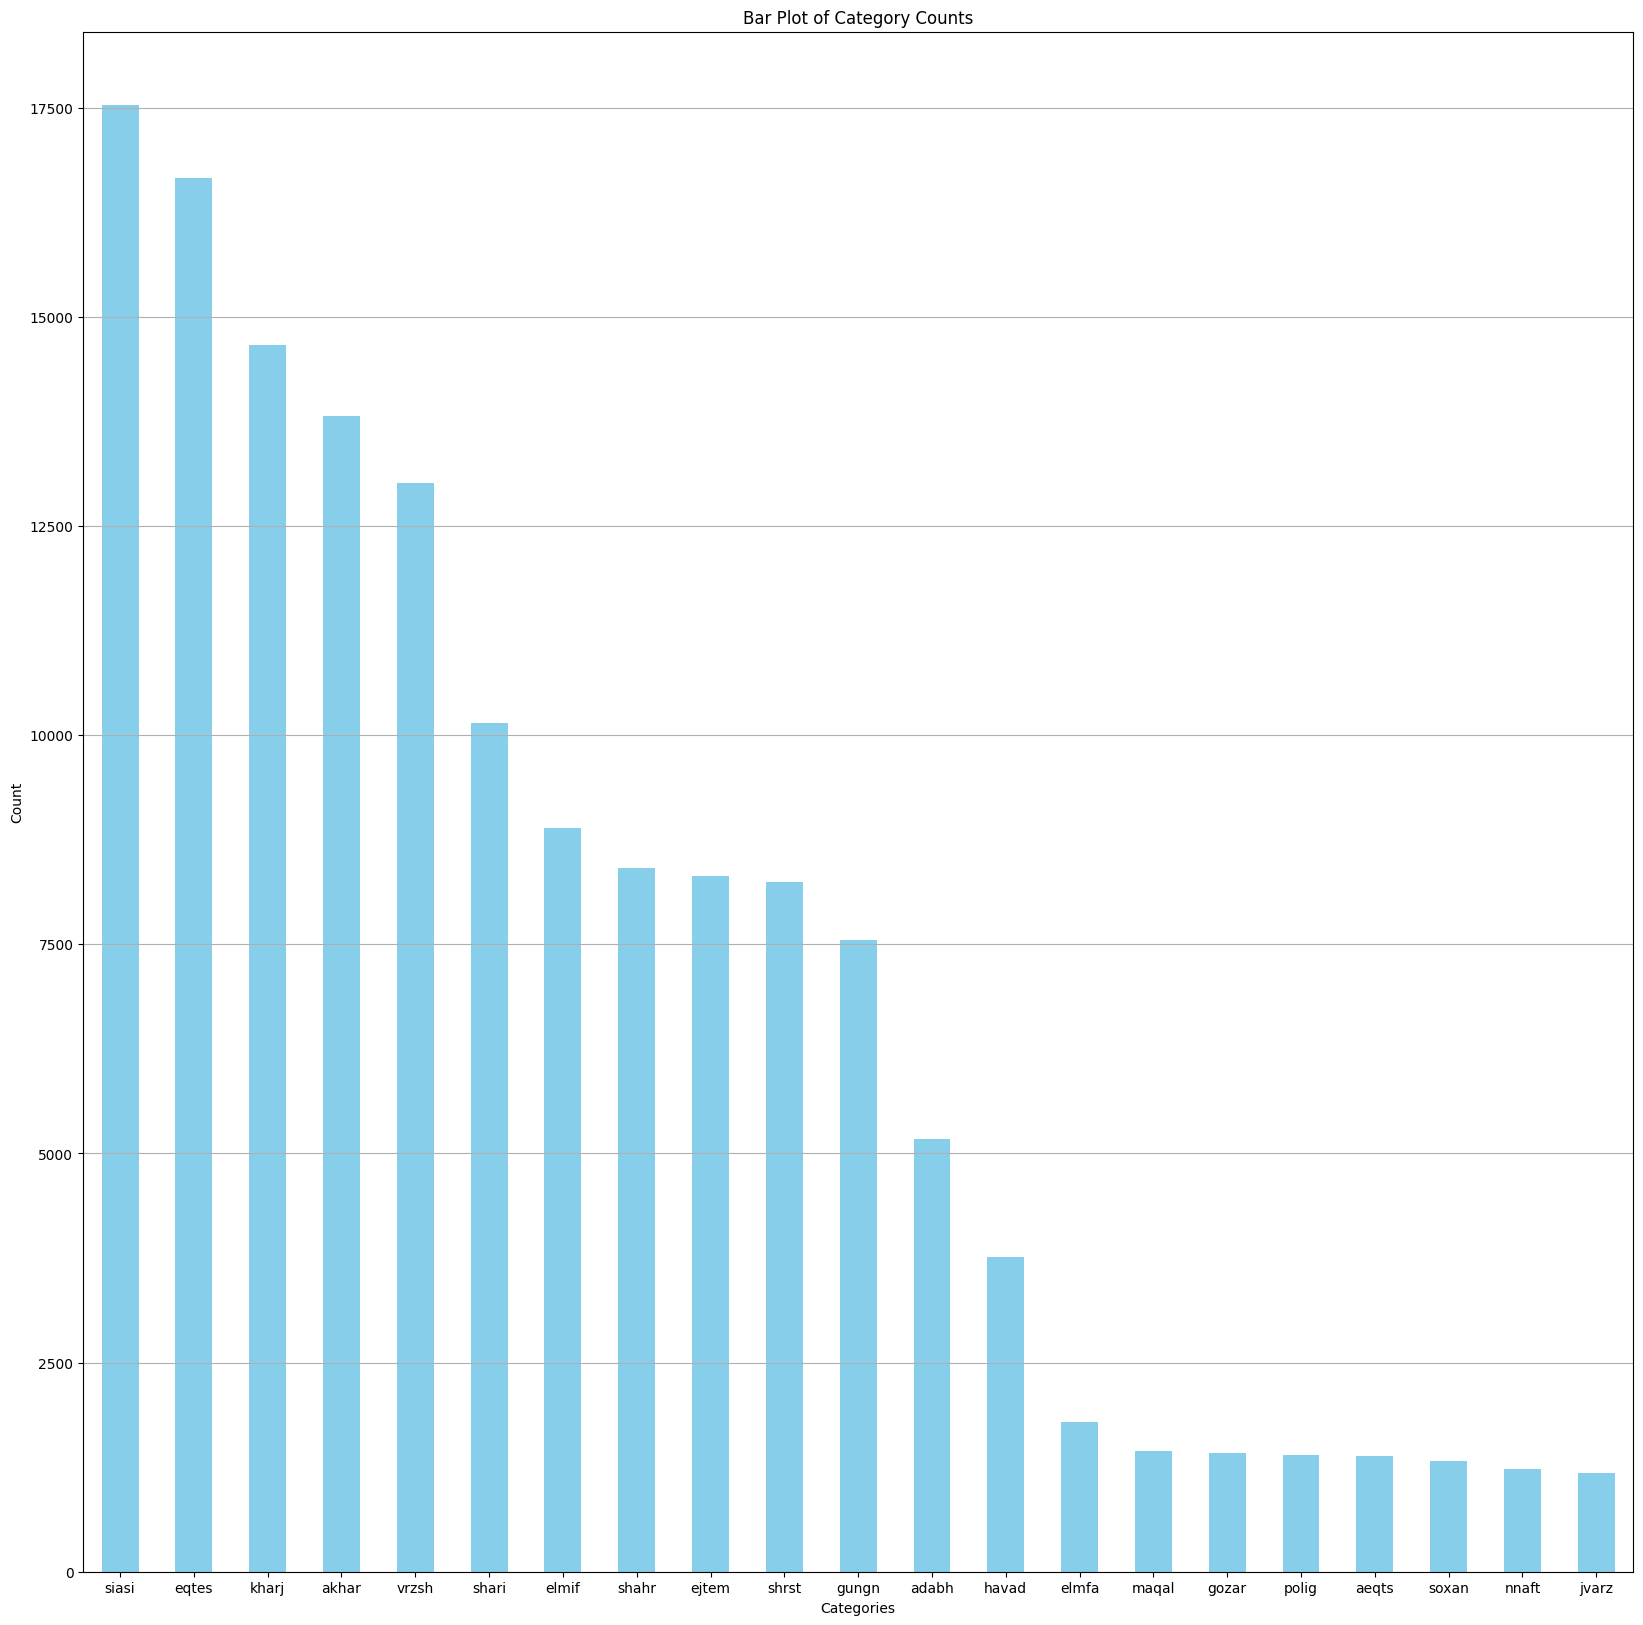

In [ ]:
# Count the occurrences of each category in the 'Cat' column
cat_counts = df['Cat'].value_counts()

# Create a bar plot
plt.figure(figsize=(20, 20))
cat_counts[:21].plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.grid(axis='y')  # Add grid lines along y-axis
plt.show()

In [ ]:
df.to_csv('sentimentDF.csv', index=False)